In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Input
from keras import layers
from keras.layers import Flatten, Dense ,Embedding
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [30]:
df_R = pd.read_csv('C:/work/ml-25m/ratings.csv')
df_M = pd.read_csv('C:/work/ml-25m/movies.csv')

In [31]:
df_R

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [32]:
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [33]:
df_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [34]:
df = pd.merge(df_R,df_M,how= 'left',on = 'movieId')

In [35]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [36]:
df.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [37]:
df.isnull().sum().sum()

0

In [ ]:
#แก้ตรงนำข้อมูลเข้าให้น้อยลง

In [38]:
df_train, df_val = train_test_split(df, train_size=0.7, stratify=df['rating'],random_state= 42)

In [39]:
df_train

,userId,movieId,rating,timestamp,title,genres
24333508,158109,3826,3.5,1495147530,Hollow Man (2000),Horror|Sci-Fi|Thriller
10639949,69064,180137,4.0,1570303631,See You Up There (2017),Comedy|Drama
18329930,118701,5617,3.5,1161567664,Secretary (2002),Comedy|Drama|Romance
24916459,162047,26268,3.5,1459091566,The Tall Blond Man with One Black Shoe (1972),Comedy|Mystery
19996267,130027,1241,4.5,1068422902,Dead Alive (Braindead) (1992),Comedy|Fantasy|Horror
...,...,...,...,...,...,...
6576445,42597,7163,4.0,1440709198,Paycheck (2003),Action|Sci-Fi|Thriller
2896594,19122,104361,4.5,1569078152,Ain't Them Bodies Saints (2013),Drama
12359451,80023,8833,3.5,1111294131,Vanity Fair (2004),Drama|Romance
6277497,40680,112852,4.0,1491868794,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [40]:
df_val

,userId,movieId,rating,timestamp,title,genres
19688389,127873,175603,3.0,1569024129,Anti Matter (2016),Sci-Fi
3733762,24642,2105,4.5,1108141982,Tron (1982),Action|Adventure|Sci-Fi
10922390,70924,1962,4.5,1225343598,Driving Miss Daisy (1989),Drama
13029338,84370,2692,4.0,995572747,Run Lola Run (Lola rennt) (1998),Action|Crime
21030624,136701,265,3.5,1265327713,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance
...,...,...,...,...,...,...
20957278,136261,79185,3.5,1389553005,Knight and Day (2010),Action|Comedy|Romance
24089021,156491,7153,4.5,1232174959,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
24677437,160356,2707,2.0,1097721927,Arlington Road (1999),Thriller
19472063,126401,2890,4.0,942512644,Three Kings (1999),Action|Adventure|Comedy|Drama|War


In [41]:
# Re-numbering userId ( to eliminate skipping id)
userId_list = df['userId'].unique()
index = 0
dict_users= {}
for ids in sorted(userId_list):
    dict_users[ids] = index
    index += 1



In [42]:
dict_users

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [43]:
movieId_list = df['movieId'].unique()
index = 0
dict_movies= {}
for ids in sorted(movieId_list):
    dict_movies[ids] = index
    index += 1

In [44]:
len(dict_users)

20000

In [45]:
len(dict_movies)

20000

In [46]:
df_train["userId"] = df_train["userId"].map(dict_users)
df_val['userId'] = df_val['userId'].map(dict_users)
df_train["movieId"] = df_train["movieId"].map(dict_movies)
df_val['movieId'] = df_val['movieId'].map(dict_movies)

In [47]:
df_train

,userId,movieId,rating,timestamp,title,genres
24333508,NaN,3724.0,3.5,1495147530,Hollow Man (2000),Horror|Sci-Fi|Thriller
10639949,NaN,NaN,4.0,1570303631,See You Up There (2017),Comedy|Drama
18329930,NaN,5507.0,3.5,1161567664,Secretary (2002),Comedy|Drama|Romance
24916459,NaN,8700.0,3.5,1459091566,The Tall Blond Man with One Black Shoe (1972),Comedy|Mystery
19996267,NaN,1208.0,4.5,1068422902,Dead Alive (Braindead) (1992),Comedy|Fantasy|Horror
...,...,...,...,...,...,...
6576445,NaN,7038.0,4.0,1440709198,Paycheck (2003),Action|Sci-Fi|Thriller
2896594,19121.0,NaN,4.5,1569078152,Ain't Them Bodies Saints (2013),Drama
12359451,NaN,8118.0,3.5,1111294131,Vanity Fair (2004),Drama|Romance
6277497,NaN,NaN,4.0,1491868794,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi


In [48]:
# Create Model NCF
EMBEDDING_SIZE=100
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(len(userId_list) + 1, EMBEDDING_SIZE,name="users_embeddings")(users_input)
users_bias = Embedding(len(userId_list) + 1, 1, name="users_bias")(users_input)
movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(len(movieId_list) + 1, EMBEDDING_SIZE,name="movies_embeddings")(movies_input)
movies_bias = Embedding(len(movieId_list) + 1, 1, name="movies_bias")(movies_input)
dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)
model = Model(inputs=[users_input, movies_input], outputs=output)
opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

In [49]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 100)       16254200    ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 100)       5904800     ['movies_input[0][0]']           
                                                                                            

In [51]:
# ------------ Training Model -------------------------------
BS = [64, 128, 256, 512, 1024, 2048] # try at least 3 values
EP = [5, 10, 20, 50, 60 ] # try at least 3 values
history = model.fit(x=[df_train.userId, df_train.movieId],y=df_train.rating,batch_size=BS[5],epochs=EP[0],verbose=1,validation_data=([df_val.userId, df_val.movieId], df_val.rating))

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'model_1/movies_bias/embedding_lookup' defined at (most recent call last):
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ACER\AppData\Local\Temp\ipykernel_5780\413152513.py", line 4, in <module>
      history = model.fit(x=[df_train.userId, df_train.movieId],y=df_train.rating,batch_size=BS[5],epochs=EP[0],verbose=1,validation_data=([df_val.userId, df_val.movieId], df_val.rating))
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_1/movies_bias/embedding_lookup'
indices[16,0] = -2147483648 is not in [0, 59048)
	 [[{{node model_1/movies_bias/embedding_lookup}}]] [Op:__inference_train_function_2121628]

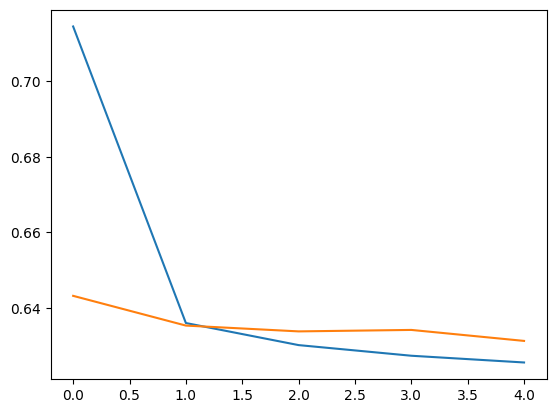

In [ ]:
plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])


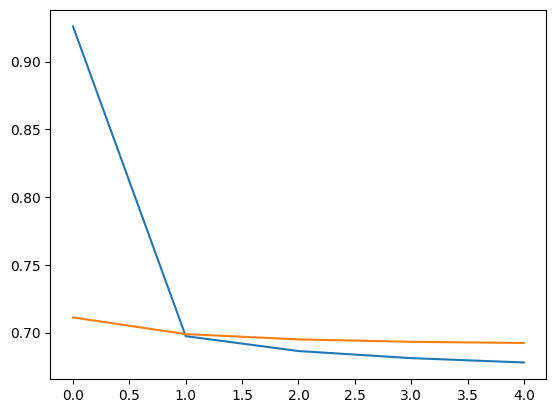

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
userPredictR = pd.DataFrame(model.predict([df_val['userId'], df_val['movieId']]))
userPredictR 

234376/234376 [==============================] - 291s 1ms/step


,0
0,3.927473
1,3.655230
2,3.840219
3,4.085793
4,4.502411
...,...
7500024,3.293229
7500025,4.437003
7500026,2.847337
7500027,3.518279
